Marçal Henrique Moreira  
Discente em Engenharia de Computação pelo IFMG - Campus Bambuí  
GitHub: https://www.github.com/marcalhenrique
----

-----------------------

<h1> Detecção de Texto em Placas de Véiculos </h1>

In [63]:
# Importando as bibliotecas

import cv2 # OpenCV
import pytesseract as tess # OCR
import pandas as pd # Dataframe
from PIL import Image # Manipulação de imagens
import numpy as np # Manipulação de arrays
from matplotlib import pyplot as plt # Visualização de dados
import seaborn as sns # Visualização de dados
import re # Expressões regulares


A célula anterior contém as importações das bibliotecas necessárias para o desenvolvimento do projeto. Como está sendo utilizado o Jupyter Notebook no VS Code, é necessário utilizar a biblioteca PIL para printar as imagens no notebook.  

# 1. PSM (Page Segmentation Mode)
O PSM é um parâmetro que define o modo de segmentação da página. Abaixo estão listados os modos de segmentação:

In [64]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


# 2. Imagem de Teste
Na célula abaixo é definida uma imagem de teste para a detecção de textos. A imagem é carregada através da função `cv2.imread()` , é feita a conversão para o espaço de cores RGB através da função `cv2.cvtColor()`, essa conversão é feita pois ao ler uma imagem o OpenCV utiliza como padrão o esquema de cor BGR e é exibida através da função `display(Image.fromarray())` .  
A variável `config_tess` é utilizada para definir o modo de segmentação da página e o idioma da imagem.  
Utilizando a função `pytesseract.image_to_string()` é feita a detecção de textos na imagem de teste.

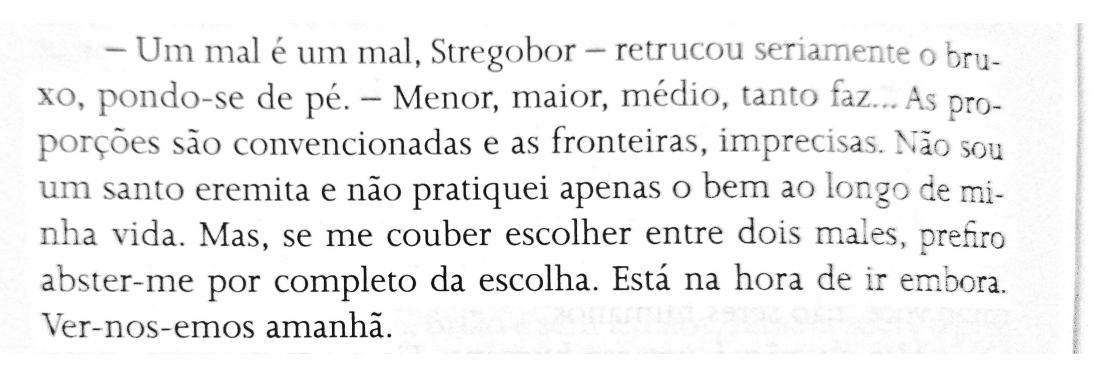

Texto da imagem: 

 — Um mal é um mal, Stregobor — retrucou seriamente o bry-
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... As pro-
porções são convencionadas e as fronteiras, imprecisas. Não sou
um santo eremita e não pratiquei apenas o bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro
abster-me por completo da escolha. Está na hora de ir embora. ;
Ver-nos-emos amanhã. |



In [65]:
imagem_teste = cv2.imread("imagens_curso/trecho_livro.png") # Carregando a imagem
imagem_teste = cv2.cvtColor(imagem_teste, cv2.COLOR_BGR2RGB) # Convertendo de BGR para RGB
display(Image.fromarray(imagem_teste)) # Exibindo a imagem
#------------------------------------------------
# Definindo configurações do Tesseract
config_tess = '--tessdata-dir tessdata --psm 6' # Configurações do Tesseract

texto_teste = tess.image_to_string(imagem_teste, lang = 'por', config=config_tess) # Aplicando OCR
print("Texto da imagem: \n\n", texto_teste) # Exibindo o texto extraído

# 3. Placa de Véiculo
A célula abaixo carrega a primeira placa de véiculo e transforma a imagem em uma imagem em escala de cinza através da função `cv2.cvtColor()`.  
Por padrão o Tesseract se da melhor com imagens em escala de cinza, pois a imagem em escala de cinza possui apenas um canal de cor, enquanto a imagem colorida possui três canais de cor, diminuindo a quantidade de dados a serem processados.

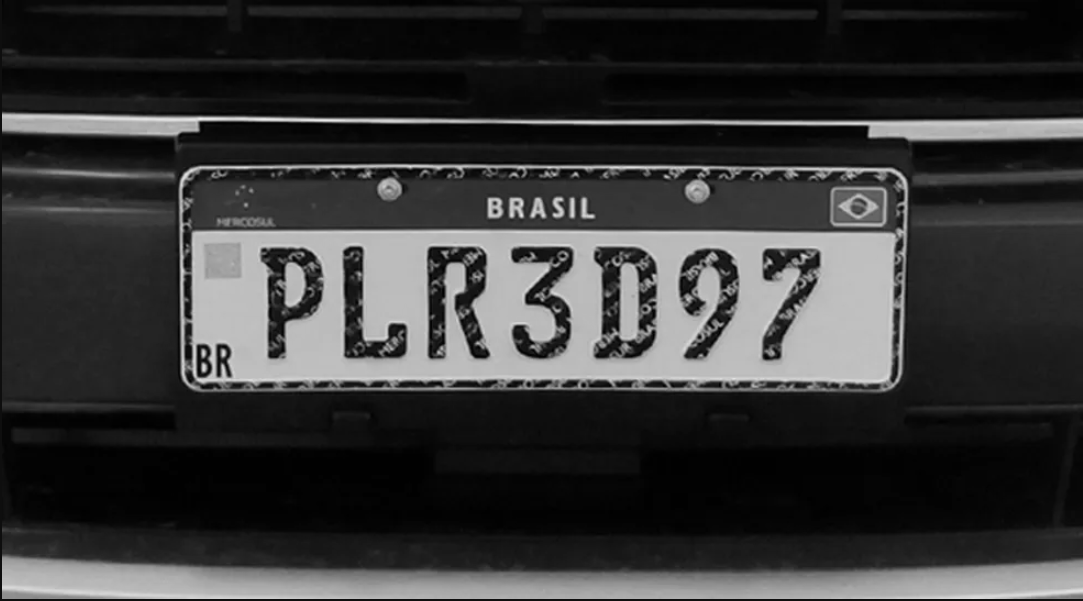

Texto da imagem: 

  



In [66]:
img = cv2.imread("imagens_curso/placa_carro1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(Image.fromarray(img))
#------------------------------------------------
# Definindo configurações do Tesseract
config_tess = '--tessdata-dir tessdata' # Configurações do Tesseract
text = tess.image_to_string(img, lang = 'por', config=config_tess) # Aplicando OCR
print("Texto da imagem: \n\n", text) # Exibindo o texto extraído


# 4. Limiarização
Como observado na célula anterior, o Tesseract não foi capaz de detectar o texto da placa do véiculo.  
Para isso acontecer é necessário aplicar conceitos de processamento de imagens, como a limiarização.  
A limiarização é um processo em que se define um limite para separar os pixels da imagem em duas classes:
- Pixels com valores abaixo do limite.
- Pixels com valores acima do limite.

A limiarização é utilizada para binarizar uma imagem, ou seja, transformar uma imagem em preto e branco.  
Para cada pixel de uma imagem em escala de cinza, é atribuído um valor de 0 a 255, onde 0 é preto e 255 é branco.  
Para isso acontecer é necessário definir um valor de limiar, que é o valor que será utilizado para separar os pixels da imagem nas duas classes.  
Se o valor do pixel for menor que o valor do limiar, o pixel será convertido para preto, caso contrário, o pixel será convertido para branco.  
Mais informações sobre a limiarização podem ser encontradas em: [Limiarização - OpenCV](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)

## 4.1. Limiarização Simples
Para aplicar a limiarização simples na imagem é utilizado a função `cv2.threshold()`, que recebe como parâmetros a imagem em escala de cinza, o valor do limiar e o valor máximo que será atribuído aos pixels.  
O método threshold retorna dois valores, o primeiro é o valor do limiar e o segundo é a imagem binarizada. De argumentos para o método treshold é passado a imagem, o valor do limiar, o valor máximo que será atribuído aos pixels e o tipo de limiarização.  

  

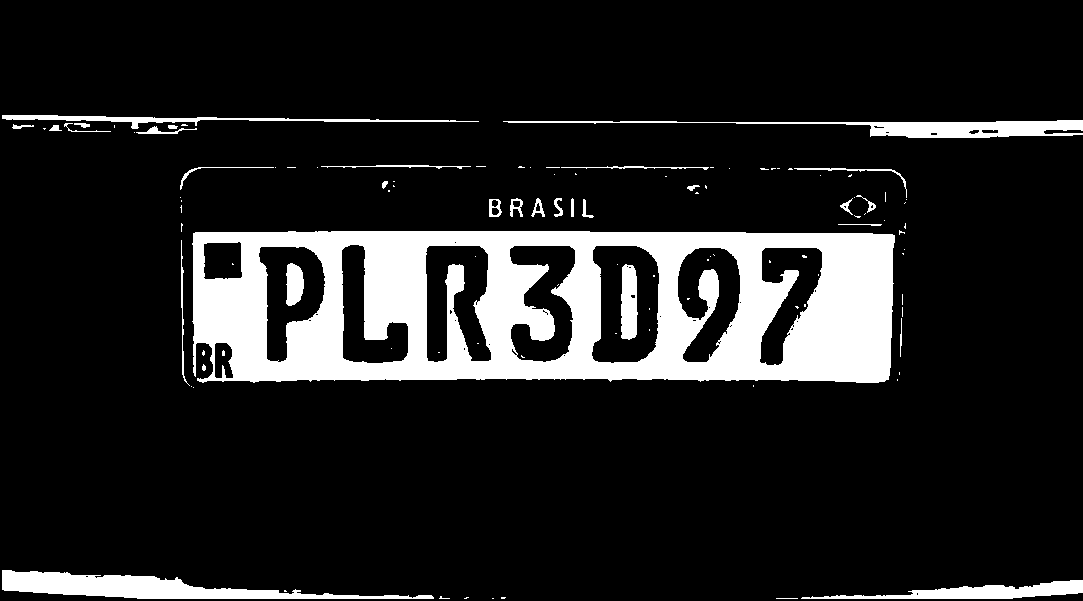

In [67]:
limiar = 175 # Limiar de binarização
limite_limiar = 255 # Limite do limiar de binarização
valor, limiar_simples = cv2.threshold(img, limiar, limite_limiar, cv2.THRESH_BINARY) # Binarização da imagem
display(Image.fromarray(limiar_simples)) # Exibindo a imagem binarizada

# 4.2. Limiarização Adaptativa
Na limiarização simples, o valor do limiar é definido manualmente, testando diferentes valores até que o texto seja detectado. Isso se torna inviável quando se trabalha com imagens de grande quantidade de pixels e uma grande quantidade de imagens.  
Limiarização adaptativa é um método de processamento de imagens em que o limiar é ajustado localmente em diferentes partes da imagem com base nas características da intensidade de pixel em cada região, em contraste com a limiarização global, em que o mesmo limiar é aplicado em toda a imagem.  
Para aplicar a limiarização adaptativa na imagem é utilizado a função `cv2.adaptativeThreshold()`, que toma três argumentos de entrada:
- **adaptativeMethod:** que determina como o limiar é calculado
- **blockSize:** que determina o tamanho da área do bairro que é usada para calcular o limiar para o pixel central.
- **C:** é uma constante subtraída da soma média ou ponderada dos pixels da vizinhança.

Para o adaptativeMethod existe dois métodos:
- **cv2.ADAPTIVE_THRESH_MEAN_C:** O limiar é calculado como a média da área do bairro menos a constante C.
- **cv2.ADAPTATIVE_THRESH_GAUSSIAN_C:** O limiar é calculado como a soma ponderada da vizinhança de pixels da área do bairro menos a constante C. A ponderação é feita com uma janela gaussiana.



### 4.2.1. Limiarização Adaptativa - Método da Média
Para aplicar a limiarização adaptativa utilizando o método da média é utilizado a função `cv2.adaptativeThreshold()`, que recebe como parâmetros a imagem em escala de cinza, o valor do limiar, o valor máximo que será atribuído aos pixels e o tipo de limiarização.  
Para o método adaptativeMethod é utilizado os seguintes parâmetros:
- Imagem em escala de cinza.
- Número máximo que será atribuído aos pixels.
- Método da média.
- Tipo de limiarização.
- Tamanho da vizinhança em pixels.
- Constante C.

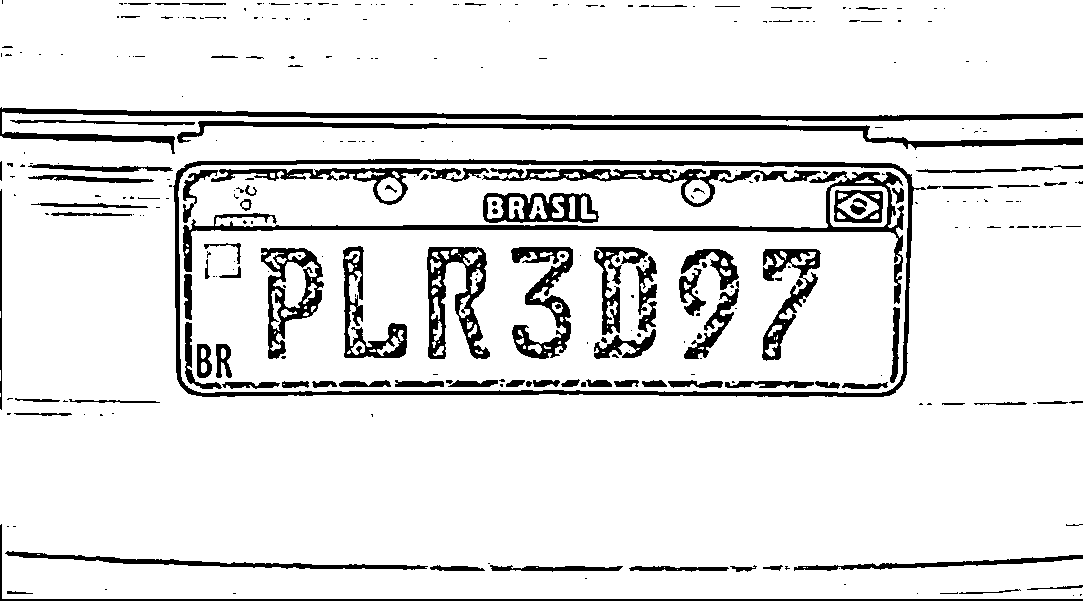

In [68]:
limite_adaptativa = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
display(Image.fromarray(limite_adaptativa)) # Exibindo a imagem binarizada

Ao aplicar a limiarização adaptativa utilizando o método da média, notase que o interior dos caracteres da placa o véiculo foi preenchido com pontos brancos, isso pode ser um problema para a detecção de textos.  
Entretanto é possível detectar a borda dos caracteres e a placa do véiculo.

### 4.2.2. Limiarização Adaptativa - Método da Média
Para aplicar a limiarização adaptativa utilizando o método gaussiano é utilizado a função `cv2.adaptativeThreshold()`.
Para o método adaptativeMethod é utilizado os seguintes parâmetros:
- Imagem em escala de cinza.
- Número máximo que será atribuído aos pixels.
- Método Gaussiano.
- Tipo de limiarização.
- Tamanho da vizinhança em pixels.
- Constante C.

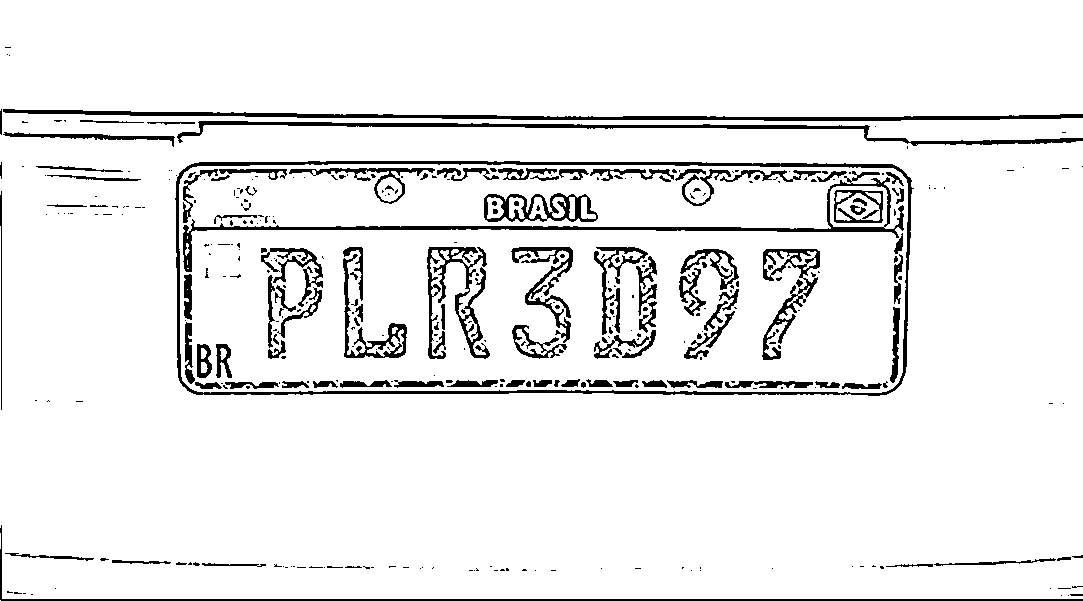

In [69]:
limite_adaptativa = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
display(Image.fromarray(limite_adaptativa)) # Exibindo a imagem binarizada

Ao observar a imagem binarizada utilizando o método gaussiano, nota-se que o o resultado foi similar ao método da média, porém a quantidade de rúidos foi reduzida.

## 4.3. Limiarização Otsu
A Binarização de Otsu é um método de limiarização em que é extraído um histograma da imagem em escala de cinza, e é escolhido dois picos do histograma, um pico para os pixels com valores abaixo do limiar e outro pico para os pixels com valores acima do limiar.



In [70]:
# Utilizando o método flatten() para transformar a imagem em um array unidimensional
print("Dimensões da imagem: ", img.shape)
img_array = img.flatten() # Transformando a imagem em um array unidimensional
print("Dimensões do array: ", img_array.shape)

Dimensões da imagem:  (601, 1083)
Dimensões do array:  (650883,)


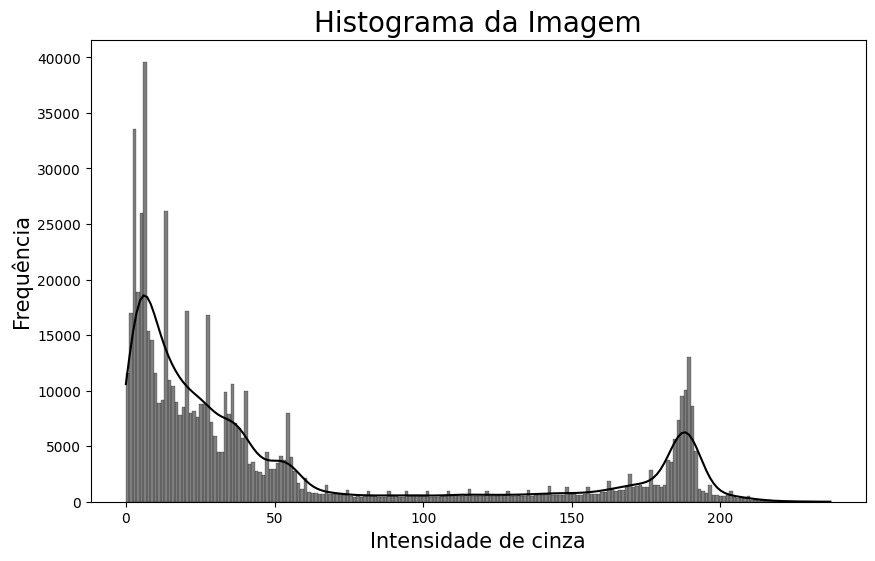

In [71]:
# Criando o histograma da escala de cinza da imagem
ax = sns.histplot(img_array, 
                          kde=True, 
                          color='black')
ax.set_title("Histograma da Imagem", fontsize=20)
ax.set_xlabel("Intensidade de cinza", fontsize=15)
ax.set_ylabel("Frequência", fontsize=15)
ax.figure.set_size_inches(10, 6)

Para mostrar o histograma da imagem em escala de cinza foi utilizado a blioteca Seaborn, que é uma biblioteca de visualização de dados baseada no matplotlib.  
Dentro dos argumentos do método `sns.histplot()` é passado a matriz da imagem em escala de cinza achatada, ou seja, a matriz da imagem em escala de cinza transformada em um vetor.  
Para achatar a matriz é utilizado o método `flatten()` do numpy.  
Para utilizar a limiarização de Otsu é utilizado a função `cv2.threshold()`, que recebe como parâmetros a imagem em escala de cinza, o valor do minimo e o valor máximo que será atribuído aos pixels, além do tipo de limiarização.  
Neste caso o tipo de limiarização é o `cv2.TRESH_BINARY` e também`cv2.THRESH_OTSU`

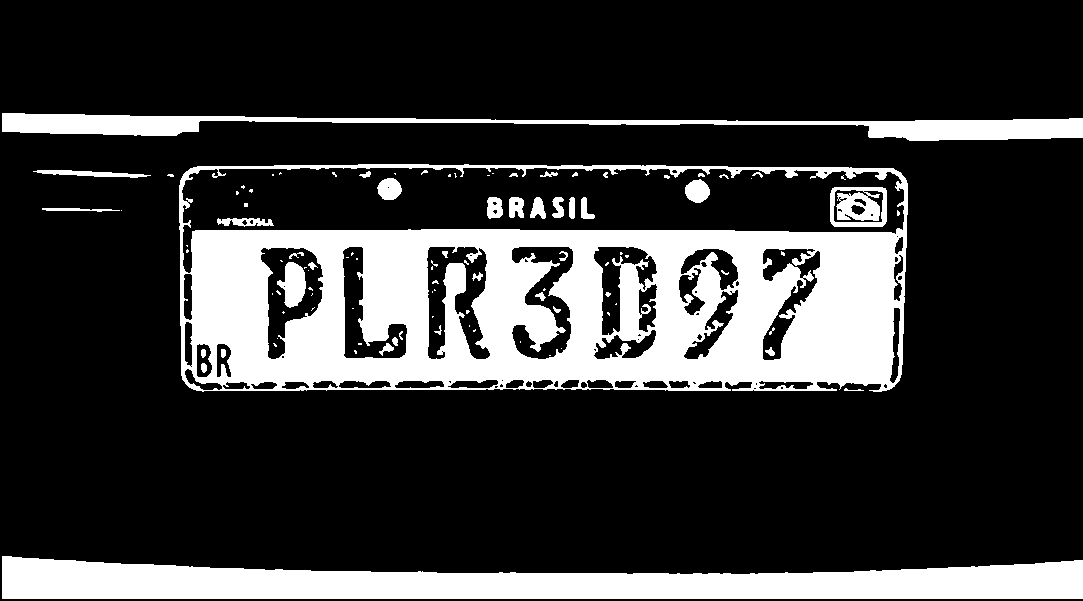

Valor do limiar que a limiarização de Otsu escolheu:  96.0


In [72]:
valor , limiar_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
display(Image.fromarray(limiar_otsu)) # Exibindo a imagem binarizada
print("Valor do limiar que a limiarização de Otsu escolheu: ", valor)

# 5. Transformações Morfológicas
Transformações morfológicas são operações simples baseadas na forma da imagem. É normalmente realizado em imagens binárias. Ele precisa de dois parâmetros, a imagem original, e o segundo chamado de **elemento estruturador** ou **kernel** que decide a natureza da operação.  
Dois operadores morfológicos básicos são Erosão e Dilatação. Com suas formas variantes, como abertura, fechamento, gradiente, etc.  
Mais informações sobre transformações morfológicas podem ser encontradas: [Transformações Morfológicas](https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html).

#  5.1. Kernel (Elemento Estruturador)
Um kernel é uma matriz de tamanho fixo que é aplicada sobre a imagem para extrair algum tipo de informação.  
Elementos estruturantes são usados para definir a forma de uma região de interesse. Essas formas podem ser retângulos, círculos, elipses, etc.  
Para definir o kernel é utilizado a função `cv2.getStructuringElement()`, que recebe como parâmetros o tipo de kernel, o tamanho do kernel e o centro do kernel.
* **cv2.MORPH_RECT:** kernel retangular.
* **cv2.MORPH_ELLIPSE:** kernel elíptico.
* **cv2.MORPH_CROSS:** kernel em forma de cruz.

```python

# Kernel retangular
> > > cv.getStructuringElement( cv.MORPH_RECT, ( 5,5 ) )
matriz ( [ [ 1, 1, 1, 1 ],
       [ 1, 1, 1, 1 ],
       [ 1, 1, 1, 1 ],
       [ 1, 1, 1, 1 ],
       [ 1, 1, 1, 1 ] ], dtype = uint8 )
# Kernel elíptico
> > > cv.getStructuringElement( cv.MORPH_ELLIPSE, ( 5,5 ) )
matriz ( [ [ 0, 0, 1, 0, 0 ],
       [ 1, 1, 1, 1 ],
       [ 1, 1, 1, 1 ],
       [ 1, 1, 1, 1 ],
       [ 0, 0, 1, 0, 0 ] ], dtype = uint8 )
# Kernel em forma de cruz
> > > cv.getStructuringElement( cv.MORPH_CROSS, ( 5,5 ) )
matriz ( [ [ 0, 0, 1, 0, 0 ],
       [ 0, 0, 1, 0, 0 ],
       [ 1, 1, 1, 1 ],
       [ 0, 0, 1, 0, 0 ],
       [ 0, 0, 1, 0, 0 ] ], dtype = uint8 )

```

## 5.2. Erosão
A erosão é uma operação morfológica que diminui os limites do objeto em primeiro plano. É aplicado um kernel que desliza sobre a imagem, o pixel central do kernel é comparado com todos os pixels sob o kernel. Se todos os pixels sob o kernel tiverem o mesmo valor do pixel central, então o pixel central é mantido, caso contrário, o pixel central é alterado para preto.


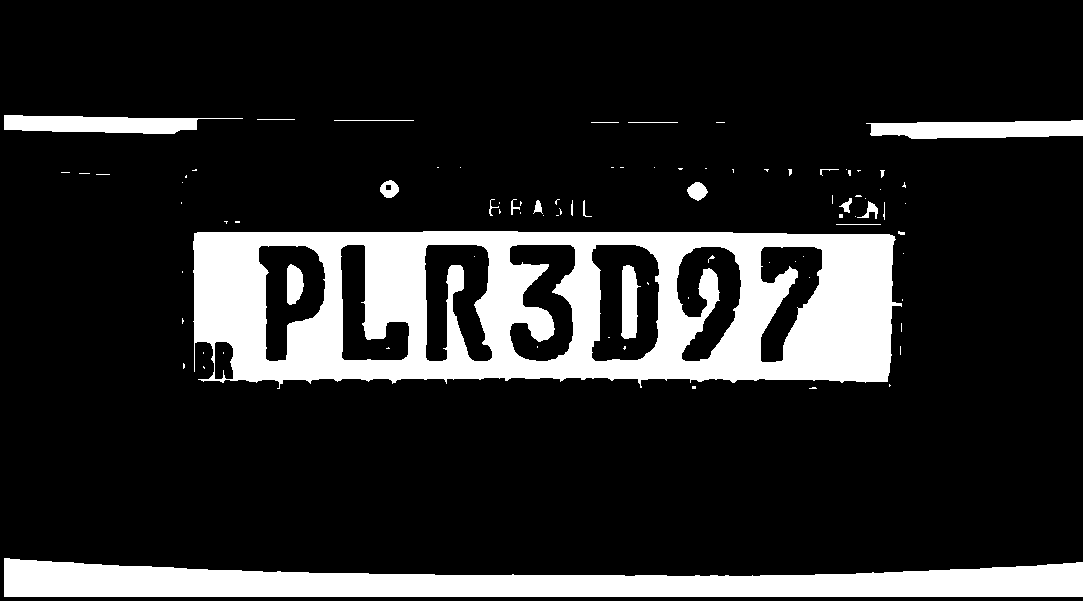

In [73]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)) # Kernel retangular de tamanho 5x5
erosao = cv2.erode(limiar_otsu, kernel, iterations=1) # Erosão da imagem
display(Image.fromarray(erosao)) # Exibindo a imagem binarizada

## 5.3. Dilatação
A dilatação é uma operação morfológica que aumenta os limites do objeto em primeiro plano. É aplicado um kernel que desliza sobre a imagem, o pixel central do kernel é comparado com todos os pixels sob o kernel. Se todos os pixels sob o kernel tiverem o mesmo valor do pixel central, então o pixel central é mantido, caso contrário, o pixel central é alterado para branco.

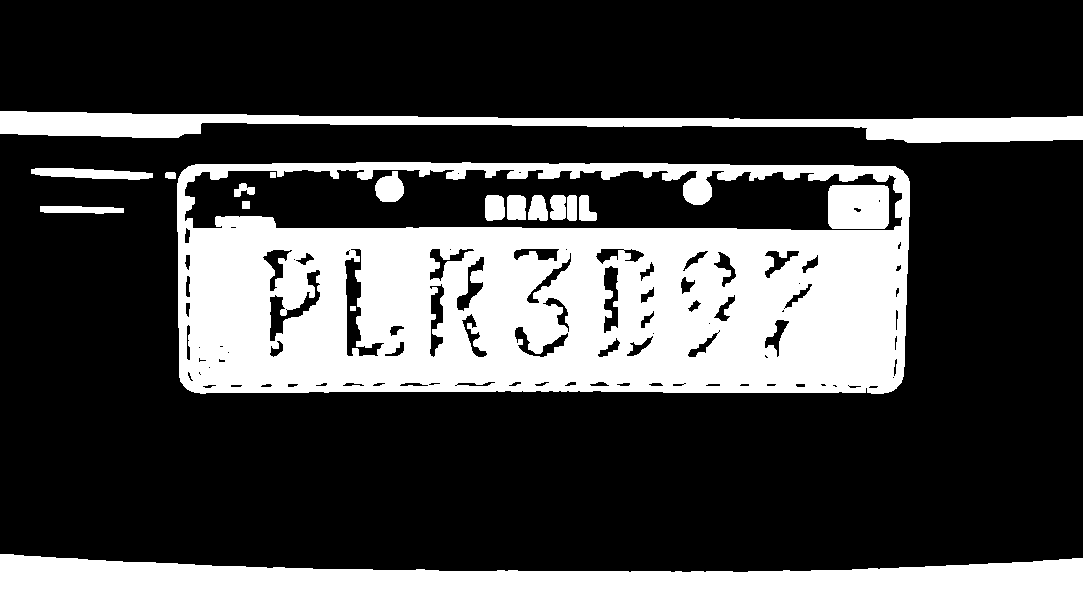

In [74]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)) # Kernel retangular de tamanho 5x5
dilatacao = cv2.dilate(limiar_otsu, kernel, iterations=1) # Dilatação da imagem
display(Image.fromarray(dilatacao)) # Exibindo a imagem binarizada

## 5.4. Abertura
A abertura é uma operação morfológica que remove o ruído da imagem. É aplicado uma erosão seguida de uma dilatação.

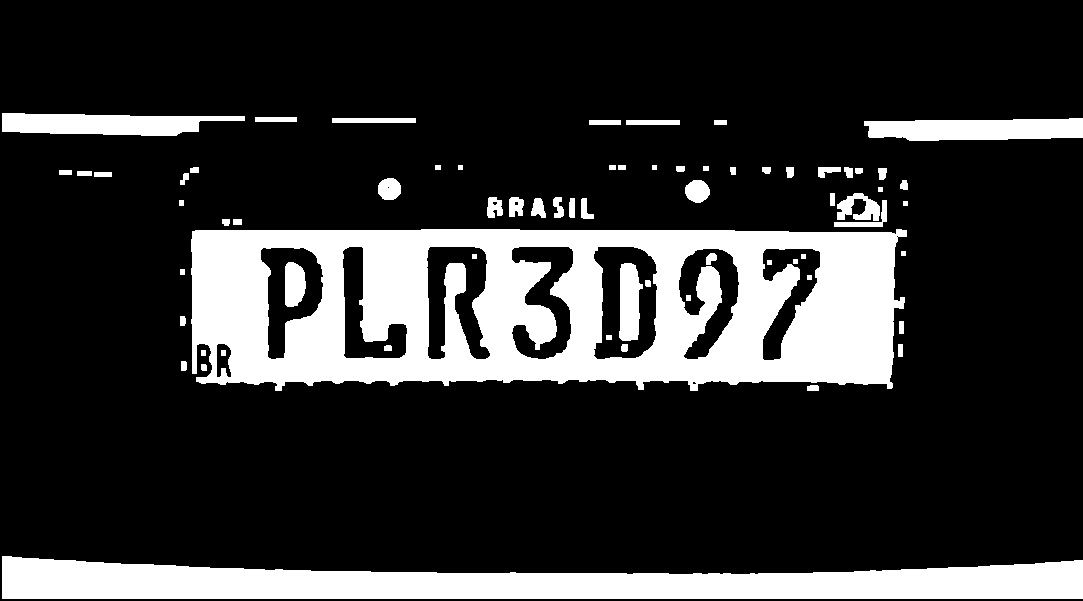

In [75]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)) # Kernel retangular de tamanho 5x5
abertura = cv2.morphologyEx(limiar_otsu, cv2.MORPH_OPEN, kernel) # Dilatação da imagem
display(Image.fromarray(abertura)) # Exibindo a imagem binarizada

## 5.5. Fechamento
O fechamento é uma operação morfológica que remove os buracos na imagem. É aplicado uma dilatação seguida de uma erosão.

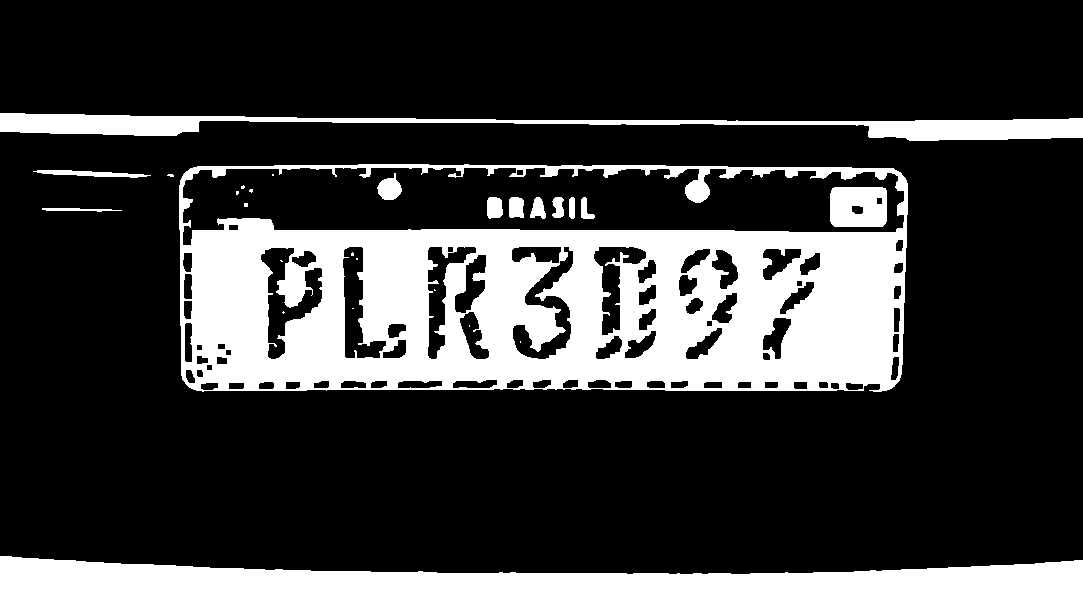

In [76]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)) # Kernel retangular de tamanho 5x5
fechamento = cv2.morphologyEx(limiar_otsu, cv2.MORPH_CLOSE, kernel) # Fechamento da imagem
display(Image.fromarray(fechamento)) # Exibindo a imagem binarizada

## 5.6. Gradiente
O gradiente é a diferença entre a dilatação e a erosão da imagem (Dilatação - Erosão).

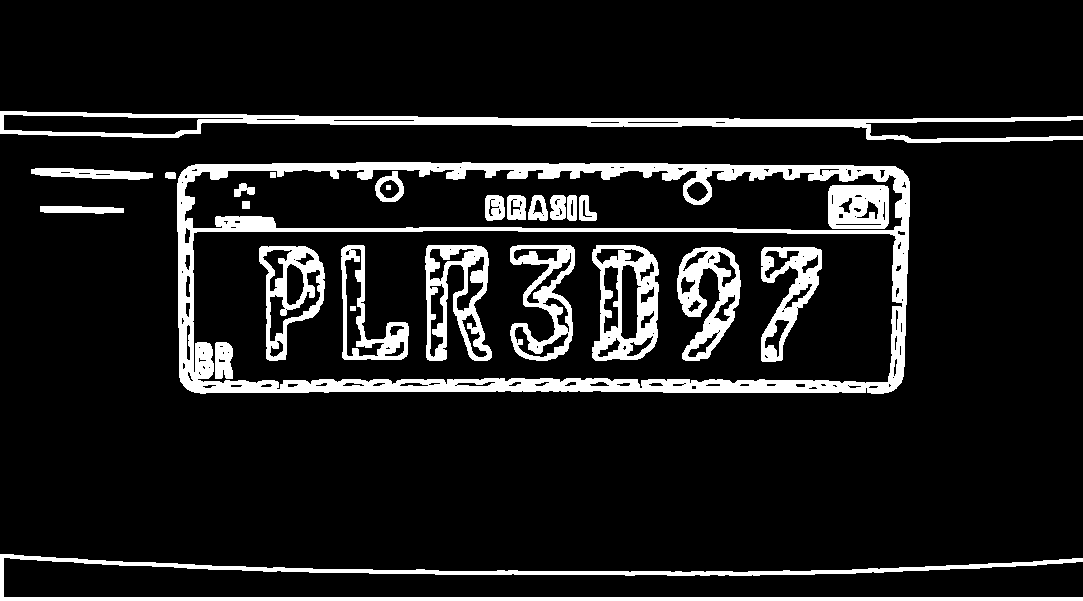

In [77]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)) # Kernel retangular de tamanho 5x5
gradiente = cv2.morphologyEx(limiar_otsu, cv2.MORPH_GRADIENT, kernel) # Gradiente da imagem
display(Image.fromarray(gradiente)) # Exibindo a imagem binarizada

## 5.7. Top Hat
É a diferença entre a imagem original e a imagem aberta (Imagem Original - Imagem Aberta). É utilizado para destacar objetos claros em fundos escuros.

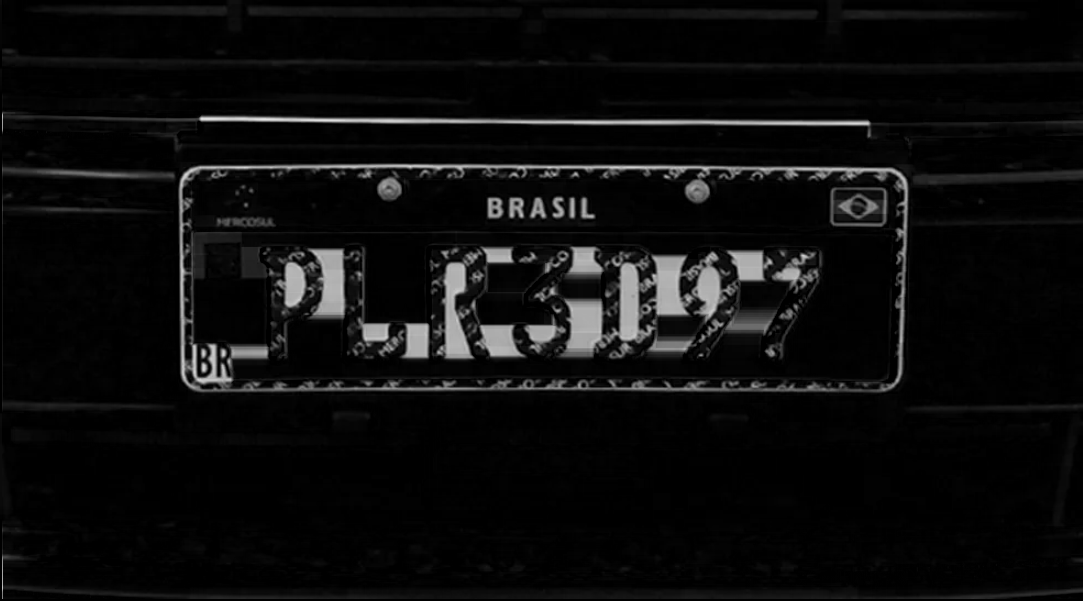

In [78]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 13)) # Kernel retangular de tamanho 40x13 tamanho oficial da placa no Brasil
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel) # Dilatação da imagem
display(Image.fromarray(tophat)) # Exibindo a imagem binarizada

## 5.8. Black Hat
É a diferença entre a imagem fechada e a imagem original (Imagem Fechada - Imagem Original). É utilizado para destacar objetos escuros em fundos claros.

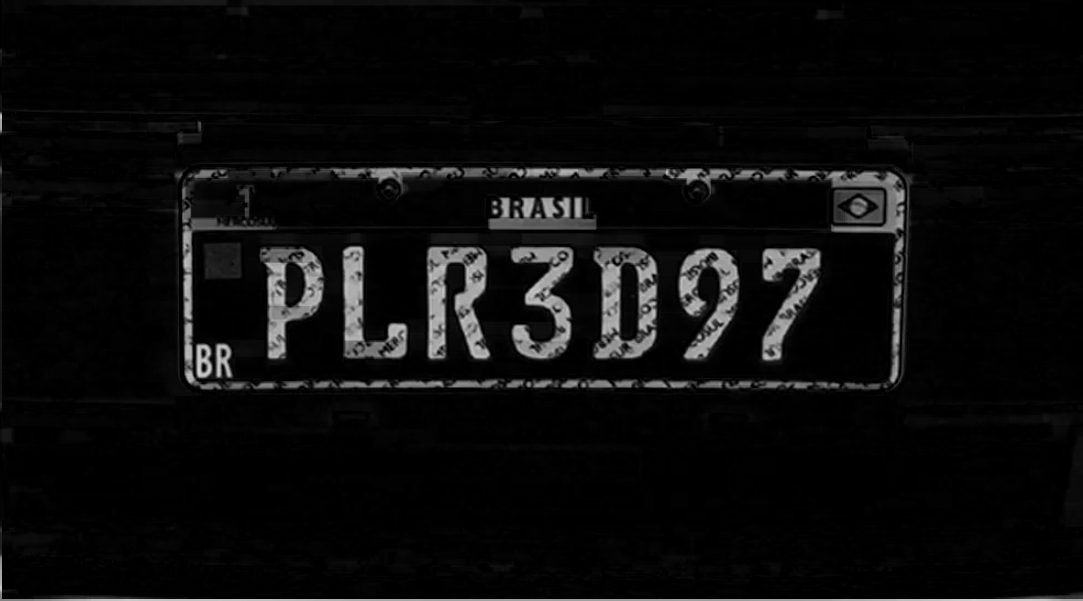

In [79]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 13)) # Kernel retangular de tamanho 40x13 tamanho oficial da placa no Brasil
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel) # Dilatação da imagem
display(Image.fromarray(blackhat)) # Exibindo a imagem binarizada

## 5.9 Utilizando o Tesseract nas Imagens
Com o pré-processamento feito, é possível utilizar o Tesseract para tentar reconhecer os caracteres das imagens.

In [80]:
config_tess = '--tessdata-dir tessdata' # Configurações do Tesseract
text_erosao = tess.image_to_string(erosao, lang = 'por', config=config_tess) # Aplicando OCR
print("Texto da imagem: \n\n", text_erosao) # Exibindo o texto extraído

Texto da imagem: 

 ee ee EN to T

EFEASIL

PLR3D97



In [81]:
text_blackhat = tess.image_to_string(blackhat, lang = 'por', config=config_tess) # Aplicando OCR
print("Texto da imagem: \n\n", text_blackhat) # Exibindo o texto extraído

Texto da imagem: 

 [PLRZÚ

'«ª%
3“&,2

_..“L.É

 



# 6. Bordas e Contornos
Bordas e contornos são características importantes em processamento de imagens para identificar mudanças significativas nos níveis de intensidade dos pixels de uma imagem. As bordas referem-se a transições abruptas de intensidade de pixel entre áreas distintas da imagem, enquanto contornos referem-se às linhas que formam a fronteira entre essas áreas distintas.  
Bordas são frequentemente detectadas usando operadores de derivada de primeira ordem, enquanto os contornos são detectados a partir da análise das bordas e da sua conectividade espacial.  
Para detectar contornos em uma imagem, é utilizado a função `cv2.findContours()`, essa função necessita de 3 parâmetros:
* **image:** imagem binária.
* **modo de recuperação de contorno:** 
  * `cv2.RETR_EXTERNAL` recupera apenas os contornos externos, 
  * `cv2.RETR_LIST` recupera todos os contornos na imagem e coloca-os em uma lista, 
  * `cv2.RETR_CCOMP` recupera todos os contornos e os organiza em duas listas de contornos: os contornos externos da primeira lista e os contornos internos ou filhos da segunda lista. Cada contorno externo tem um índice para a lista de contornos internos, 
  * `cv2.RETR_TREE` recupera todos os contornos e os organiza em uma árvore de contornos.
* **método de aproximação de contorno:** 
  * `cv2.CHAIN_APPROX_NONE` armazena todos os pontos de contorno, 
  * `cv2.CHAIN_APPROX_SIMPLE` armazena apenas os pontos finais de cada linha de contorno, descartando todos os pontos intermediários.

Mais informações sobre contornos podem ser encontradas: [Contornos](https://docs.opencv.org/master/d4/d73/tutorial_py_contours_begin.html).

## 6.1. Canny Edge Detection
Canny Edge Detection é um algoritmo de detecção de bordas em imagens que utiliza um processo em várias etapas para indentificar as bordas com alta precisão e baixo ruído. O algoritmo envolve a aplicação de suavização gaussiana, detecção de gradientes de intensidade de pixel, a supressão de não-máximos e a histerese para eliminar bordas fracas e conectar bordas fortes em uma curva contínua.  
Mais informações sobre o algoritmo podem ser encontradas: [Canny Edge Detection](https://docs.opencv.org/master/da/d22/tutorial_py_canny.html).  
A função `cv2.Canny()` é utilizada para detectar as bordas em uma imagem. Essa função necessita de 3 parâmetros:
* **image:** imagem de entrada.
* **minVal:** valor mínimo de intensidade de pixel para considerar uma borda.
* **maxVal:** valor máximo de intensidade de pixel para considerar uma borda.


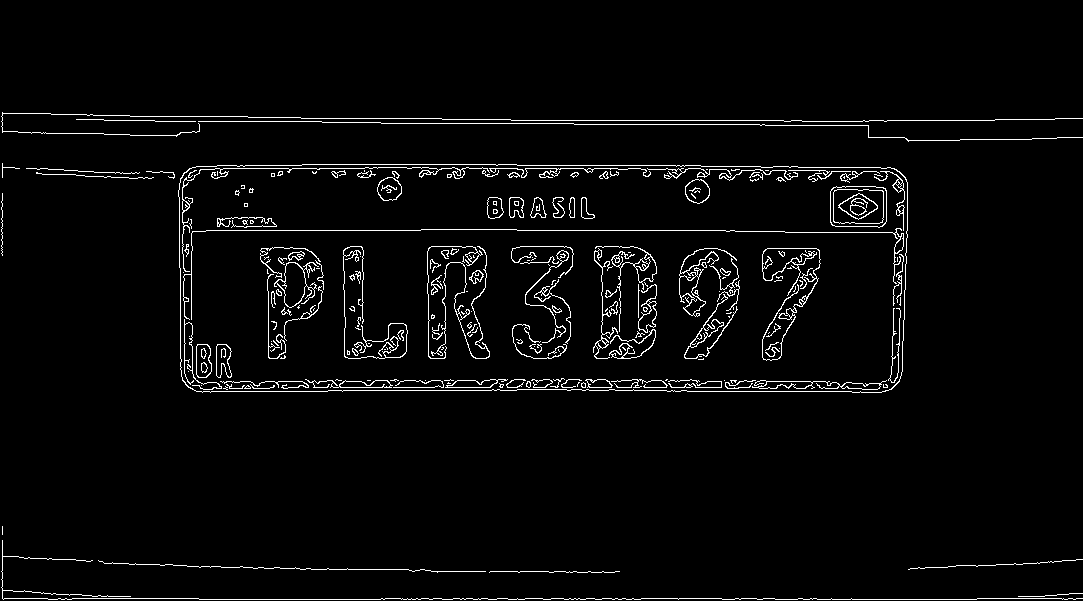

In [82]:
bordas = cv2.Canny(img, 100, 200)
display(Image.fromarray(bordas)) # Exibindo a imagem binarizada

In [83]:
contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Encontrando os contornos
print("Número de contornos encontrados: ", len(contornos)) # Exibindo o número de contornos encontrados


Número de contornos encontrados:  362


## 6.2. Aproximação de Contornos
Aproxima uma forma de contorno a outra forma com menos números de vértices, dependendo da precisão especificada.  
Para o entendimento, suponha que estejamos tentando encontrar um quadrado em uma imagem, mas devido a alguns problemas na imagem, não é possível obter um quadrado perfeito, mas um quadrado com alguns pontos fora do lugar.
Com as coordenadas do contorno obtidas, é possível identificar aqueles que possuem um formato semelhante a um retângulo, quadrado, círculo, etc. Para isso, é utilizado a função `cv2.approxPolyDP()`, essa função necessita de 3 parâmetros:
* **contour:** contorno a ser aproximado.
* **epsilon:** precisão da aproximação.
* **closed:** se o contorno é fechado ou não.

Para o calculo do epislon, é utilizado a seguinte fórmula: `epsilon = porcentagem * cv2.arcLength(contour, True)`.  
Onde a porcentagem é um valor entre 0 e 1, quanto menor o valor, mais precisão a aproximação terá e quanto maior o valor, menos precisão a aproximação terá.  
cv2.arcLength() calcula o comprimento de uma curva ou um contorno fechado, essa função necessita de 2 parâmetros:
* **contour:** contorno a ser calculado o comprimento.
* **closed:** se o contorno é fechado ou não.

In [84]:
# for necessário para percorrer todos os contornos encontrados
for contorno in contornos:
    epslom = 0.02 * cv2.arcLength(contorno, True)
    aprox = cv2.approxPolyDP(contorno, epslom, True)

    if cv2.isContourConvex(aprox) and len(aprox) == 4:
        localizacao = aprox
        break

print("Localização da placa: ", localizacao)


Localização da placa:  [[[180 178]]

 [[196 391]]

 [[901 375]]

 [[894 168]]]


`cv2.isContourConvex()` verifica se um contorno é convexo ou não, um contorno é convexo se, para qualquer dois pontos no contorno, o segmento de reta que os conecta estiver sempre dentro do contorno.  
Utilizando o `len(aprox) == 4`, é definido que o contorno contém 4 vértices, ou seja, é um quadrado ou retângulo.  
Com a localização das coordenadas da borda do quadrado, é possível extrair o ponto inicial, o comprimento e a altura do retângulo. Para obter o ponto inicial, é utilizado a função `cv2.boundingRect()` utilizando como parametro o contorno do retângulo.

In [85]:
x, y, w, h = cv2.boundingRect(localizacao) # Obtendo as coordenadas do retângulo que envolve a placa
print(f"Coordenadas do retângulo: \n", x, y, w, h)


Coordenadas do retângulo: 
 180 168 722 224


Com as coordenadas do retângulo que envolve a placa é possível extrair a placa da imagem original.  
`placa = img[y:y+h, x:x+w]` onde `y` é a coordenada y do ponto inicial, `h` é a altura do retângulo e `x` é a coordenada x do ponto inicial, `w` é a largura do retângulo.

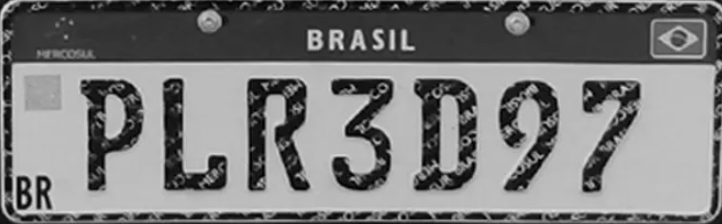

In [86]:
placa = img[y:y+h, x:x+w]
display(Image.fromarray(placa)) # Exibindo a imagem binarizada

# 7. Reconhecimento de Caracteres
Com a placa extraída da imagem, é possível aplicar os pré-processamentos ja estudados para tentar reconhecer os caracteres da placa.

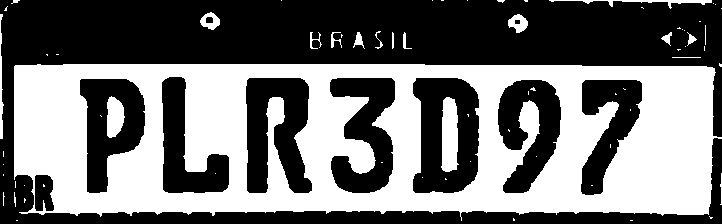

Texto da imagem: 

 L PLR3D97



In [87]:
# Utilizando a limiarização de Otsu para binarizar a imagem
valor, limiar_otsu = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# Utilizando a erosaõ para remover ruídos
erosao = cv2.erode(limiar_otsu, cv2.getStructuringElement(cv2.MORPH_RECT, (4, 4)), iterations=1)
display(Image.fromarray(erosao)) # Exibindo a imagem binarizada

# Aplicando OCR na imagem
config_tess = '--tessdata-dir tessdata --psm 6'
text_placa = tess.image_to_string(erosao, lang = 'por', config=config_tess)
print("Texto da imagem: \n\n", text_placa) # Exibindo o texto extraído

## 7.1 Expressões Regulares
Expressões regulares, também chamadas de regex, são combinações de caracteres que podemos usar para representar partes de uma string. Elas são bem úteis para procurar padrões de escrita em textos ou validar informações.  
As expressões regulares podem conter caracteres especiais e comuns. A maioria dos caracteres comuns, como '3', 'a', ou 'palavra', são as expressões regulares mais simples. Elas simplesmente servem para procurar uma expressão ou palavra específica em um texto, por exemplo.
Já os caracteres especiais são úteis para representar classes de caracteres comuns para indentificar padrões nas strings. Atraves da biblioteca `re`. Abaixo uma lista de caracteres especiais:

| Caractere | Descrição |
| --- | --- |
| . (Ponto) | Qualquer caractere (exceto nova linha) |
| * (Asterisco) | 0 ou mais ocorrências do caractere anterior |
| ? (Interrogação) | 0 ou 1 ocorrência do caractere anterior |
| + (Sinal de mais) | 1 ou mais ocorrências do caractere anterior |
| ^ (Circunflexo) | Início da string |
| $ (Cifrão) | Fim da string |
| {m} | Indica que o caractere anterior deve aparecer exatamente m vezes |
| [] | Indica um conjunto de caracteres Ex: [abc] |
| \d | Qualquer digito decimal de 0 a 9. Equivale a [0-9] |
| \D | Qualquer caractere que não seja um digito decimal. Equivale a [^0-9] |
| \s | Qualquer caractere de espaço em branco. Equivale a [ \t\n\r\f\v] |
| \S | Qualquer caractere que não seja um espaço em branco. Equivale a [^ \t\n\r\f\v] |
| \w | Qualquer caractere alfanumérico. Equivale a [a-zA-Z0-9_] |


Como observado na célula anterior, o Tesseract conseguiu extrair os caracteres da placa, porém, ele indentificou o BR como sendo L. Como é definido por padrão todas as placas do Brasil tem essa informação, então é possível tratar esse L.  
Por padrão as placas do Brasil tem o seguinte formato: `AAA-0000` ou `AAA0A00`, tornando assim uma expressão regular.  
Para a expressão regular, é utilizado a função `re.search()` que retorna um objeto `Match` se a expressão regular for encontrada, caso contrário, retorna `None`.
Expressão regular via re para o segundo padrão: `(\w{3}\d{1}\w{1}\d{2})`

In [88]:
regex = '\w{3}\d{1}\w{1}\d{2}'
placa = re.search(regex, text_placa)
print("Placa encontrada:", placa.group(0))

Placa encontrada: PLR3D97


# 8. Imagem de Carro 2
Abaixo, algumas imagens que foram utilizadas para testar o algoritmo.

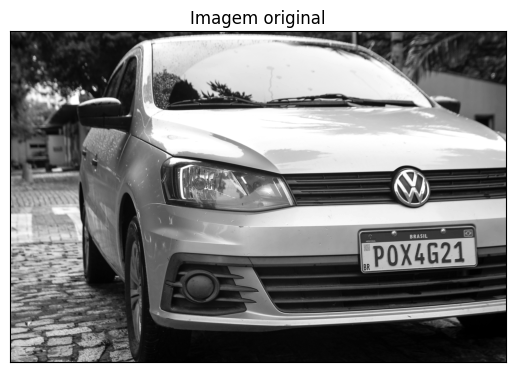

In [89]:
img = cv2.imread("imagens_curso/placa_carro2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mostrando a imagem de uma forma diferente
plt.imshow(img, cmap='gray') # Exibindo a imagem em tons de cinza
plt.title("Imagem original"), plt.xticks([]), plt.yticks([]) # Definindo o título da imagem
plt.show()

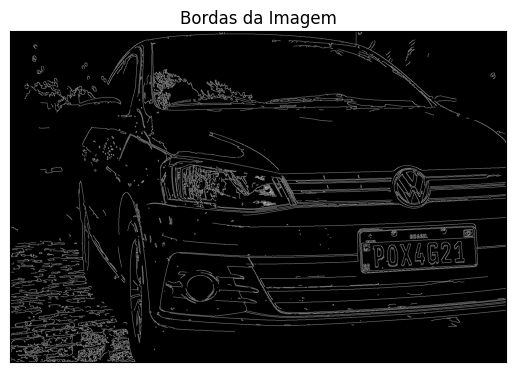

In [90]:
bordas = cv2.Canny(img, 100, 200)
plt.imshow(bordas, cmap='gray') # Exibindo a imagem em tons de cinza
plt.title("Bordas da Imagem"), plt.xticks([]), plt.yticks([]) # Definindo o título da imagem
plt.show()

Ao observar a imagem da célula anterior, é possível notar que existe um número muito maior de bordas do que o exemplo anterior. Entretanto a placa ocupa uma área consideravelmente grande na imagem, portanto é possível hierarquizar as bordas encontradas, para que a placa seja a primeira borda encontrada.

In [91]:
contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Encontrando os contornos
# key = cv2.contourArea, reverse=True) # Ordenando os contornos de acordo com o tamanho da área
contornos = sorted(contornos, key=cv2.contourArea, reverse=True)[:15]

# for necessário para percorrer todos os contornos encontrados
for contorno in contornos:
    epslom = 0.02 * cv2.arcLength(contorno, True)
    aprox = cv2.approxPolyDP(contorno, epslom, True)

    if cv2.isContourConvex(aprox) and len(aprox) == 4:
        localizacao = aprox
        break

print("Localização da placa: ", localizacao)


Localização da placa:  [[[1659  737]]

 [[1656  835]]

 [[1260  850]]

 [[1259  756]]]


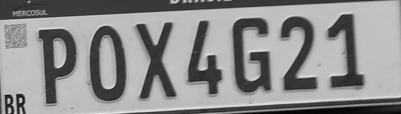

In [92]:
x, y, w, h = cv2.boundingRect(localizacao) # Obtendo as coordenadas do retângulo que envolve a placa
placa = img[y:y+h, x:x+w]
display(Image.fromarray(placa)) # Exibindo a imagem


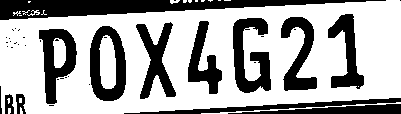

Texto da imagem sem o regex: 

 “POX4G21



In [93]:
valor, limiar_otsu = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
display(Image.fromarray(limiar_otsu)) # Exibindo a imagem

# Aplicando OCR na imagem
config_tess = '--tessdata-dir tessdata --psm 6'
text_placa = tess.image_to_string(limiar_otsu, lang = 'por', config=config_tess)
print("Texto da imagem sem o regex: \n\n", text_placa) # Exibindo o texto extraído

In [94]:
regex = '\w{3}\d{1}\w{1}\d{2}'
placa = re.search(regex, text_placa)
print("Placa encontrada:", placa.group(0))

Placa encontrada: POX4G21


# 9. Imagem de Carro 3

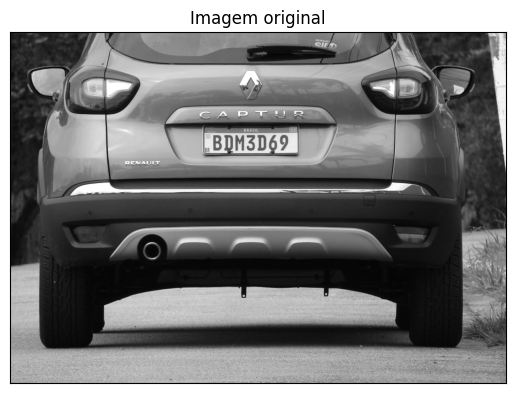

In [95]:
img = cv2.imread("imagens_curso/placa_carro3.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray') # Exibindo a imagem em tons de cinza
plt.title("Imagem original"), plt.xticks([]), plt.yticks([]) # Definindo o título da imagem
plt.show()

Ao analisar a imagem da célula anterior, é possível notar que existe um sombreamento na placa, o que dificulta a indentificação do contorno da placa. Neste exemplo será utilizado uma outra abordagem para a identificação do contorno da placa.

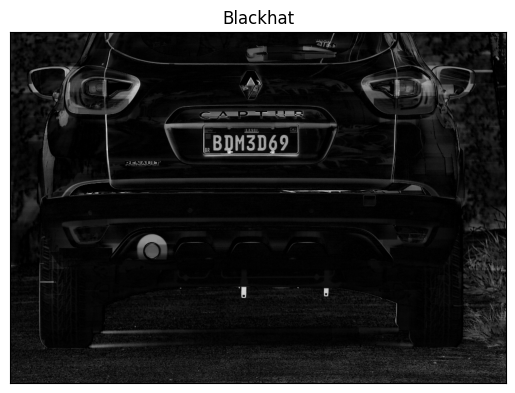

In [96]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 13)) # Tamanho do kernel padrão para placas de carro no Brasil
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel) # Aplicando a transformação morfológica Blackhat
plt.imshow(blackhat, cmap='gray') # Exibindo a imagem em tons de cinza
plt.title("Blackhat"), plt.xticks([]), plt.yticks([]) # Definindo o título da imagem
plt.show()

O algoritmo de Sobel calcula a magnitude do gradiente da intensidade do pixel em uma imagem e a direção do gradiente em cada pixel, usando operadores de derivada de primeira ordem.  
A função Sobel do OpenCV aplica o operador de Sobel em uma imagem para calcular a magnitude do gradiente em duas direções diferentes(horizontal e vertical). Ela produz duas matrizes de sáida, uma para cada direção, que contêm os valores de gradiente calculados para cada pixel da imagem. A magnitude do gradiente é calculada como a raiz quadrada da soma dos quarados do gradiente horizontal e vertical de cada pixel.  
A funcão `cv2.Sobel()` é útil para detecção de bordas em imagens, pois é capaz de destacar as regiões onde ocorrem transições abruptas na intensidade de pixel.  
Para aplicar o algoritmo de Sobel, é necessário converter a imagem para escala de cinza, pois o algoritmo de Sobel é aplicado em imagens em escala de cinza.  
`cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=3)` onde `img` é a imagem a ser aplicado o algoritmo, `cv2.CV_8U` é o tipo de dados da imagem de saída, `1` é a direção horizontal, `0` é a direção vertical e `ksize` é o tamanho do kernel.  
A função absolute() é utilizada para converter os valores negativos para positivos, pois o algoritmo de Sobel retorna valores negativos.  
Depois de utilizar a função absolute(), é necessário converter os valores para o tipo de dados da imagem de saída, que no caso é 8 bits unsigned integer.  
Para mais informações sobre o algoritmo de Sobel, acesse: [Sobel Operator](https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html)

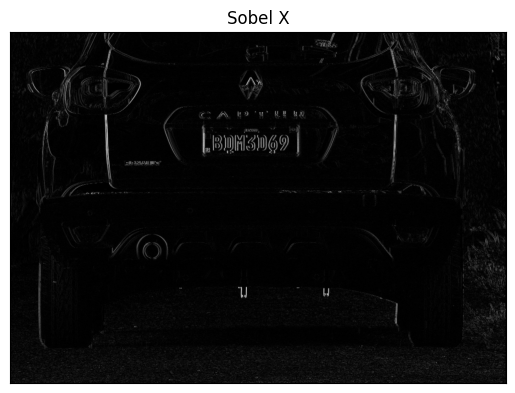

In [97]:
sobel_x = cv2.Sobel(blackhat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=1)
sobel_x = np.absolute(sobel_x)
sobel_x = sobel_x.astype("uint8")
plt.imshow(sobel_x, cmap='gray') # Exibindo a imagem em tons de cinza
plt.title("Sobel X"), plt.xticks([]), plt.yticks([]) # Definindo o título da imagem
plt.show()

Agora ira ser aplicado uma transformação de fechamento na imagem para expandir a região clara da placa. Para isso será utilizado um kernel retangular com as proporções da placa.  Dessa maneira os contornos destacados com o Sobel vão se expandir tornando a placa mais visível. Em seguida será aplicado a limiarização para que esta região fique mais clara.  
Para iniciar a transformação é aplicado o efeito de desfoque `gaussian blur`, que deve remover alguns rúidos da imagem gerados pelo algoritmo de Sobel.

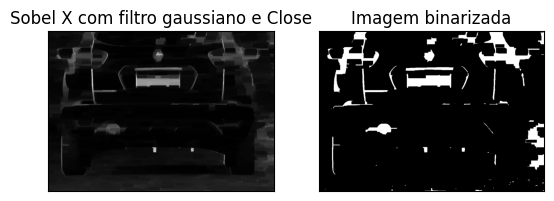

In [98]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 13)) # Tamanho do kernel padrão para placas de carro no Brasil
sobel_x = cv2.GaussianBlur(sobel_x, (5, 5), 0) # Aplicando o filtro gaussiano onde o kernel é 5x5 e o desvio padrão é 0
sobel_x = cv2.morphologyEx(sobel_x, cv2.MORPH_CLOSE, kernel) # Aplicando a transformação morfológica Close
valor, limiarizacao = cv2.threshold(sobel_x, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)


plt.subplot(121), plt.imshow(sobel_x, cmap='gray') # Exibindo a imagem em tons de cinza
plt.title("Sobel X com filtro gaussiano e Close"), plt.xticks([]), plt.yticks([]) # Definindo o título da imagem
plt.subplot(122), plt.imshow(limiarizacao, cmap='gray') # Exibindo a imagem em tons de cinza
plt.title("Imagem binarizada"), plt.xticks([]), plt.yticks([]) # Definindo o título da imagem
plt.show()


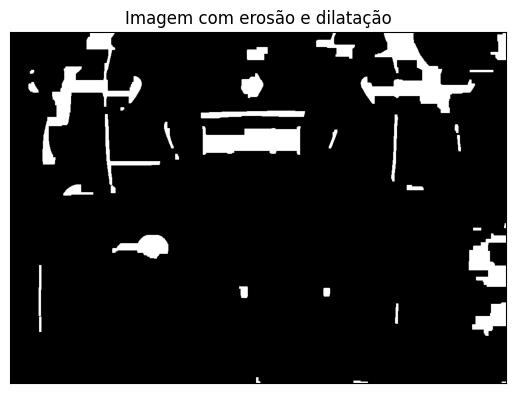

In [99]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
erosao = cv2.erode(limiarizacao, kernel, iterations=2) # iterations = número de vezes que a erosão será aplicada
dilatacao = cv2.dilate(erosao, kernel, iterations=2) # iterations = número de vezes que a dilatação será aplicada
plt.imshow(dilatacao, cmap='gray') # Exibindo a imagem em tons de cinza
plt.title("Imagem com erosão e dilatação"), plt.xticks([]), plt.yticks([]) # Definindo o título da imagem
plt.show()

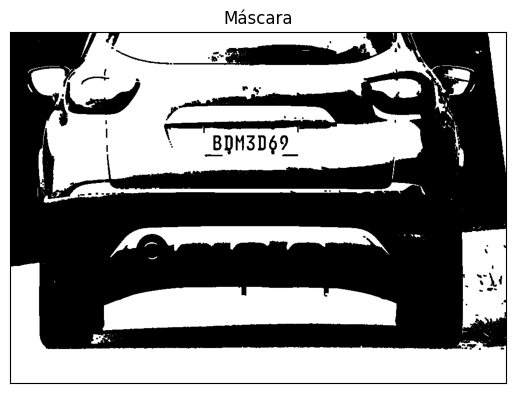

In [100]:
fechamento = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel) # Aplicando a transformação morfológica Close
valor, mascara = cv2.threshold(fechamento, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(mascara, cmap='gray') # Exibindo a imagem em tons de cinza
plt.title("Máscara"), plt.xticks([]), plt.yticks([]) # Definindo o título da imagem
plt.show()

Operações bitwise ou bit a bit são úteis para extrair qualquer parte da imagem com um formato personalizado, diferente de um retângulo, círculo, ou outras figuras geométricas. Essas operações consistem em utilizar operações lógicas como AND, OR, NOT e XOR pixel a pixel da imagem. É possível aplicar uma mascara para definir a região em que será realizada a operação lógica.  
Para mais informações sobre operações bitwise, acesse: [Bitwise Operations](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14)

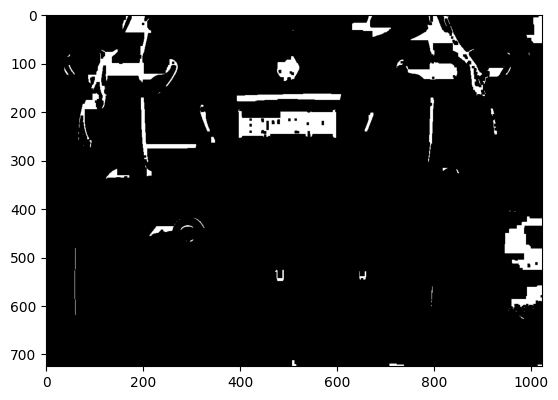

In [101]:
limiarizacao = cv2.bitwise_and(dilatacao, dilatacao, mask=mascara) # Aplicando a operação AND bit a bit
limiarizacao = cv2.dilate(limiarizacao, kernel, iterations=2) # aplicando a dilatação
limiarizacao = cv2.erode(limiarizacao, kernel, iterations=2) # aplicando a erosão
plt.imshow(limiarizacao, cmap='gray') # Exibindo a imagem em tons de cinza

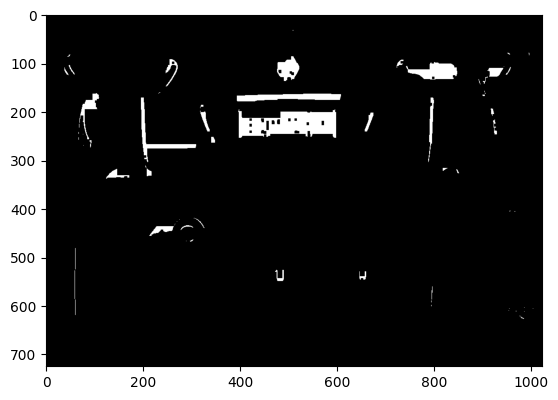

In [102]:
from skimage.segmentation import clear_border

limiarizacao = clear_border(limiarizacao) # Removendo os objetos que tocam a borda da imagem
plt.imshow(limiarizacao, cmap='gray') # Exibindo a imagem em tons de cinza

In [103]:
contornos, hierarquia = cv2.findContours(limiarizacao, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Obtendo os contornos da imagem
contornos = sorted(contornos, key=cv2.contourArea, reverse=True)[:10] # Ordenando os contornos pela área

Placa encontrada: BDM3D69


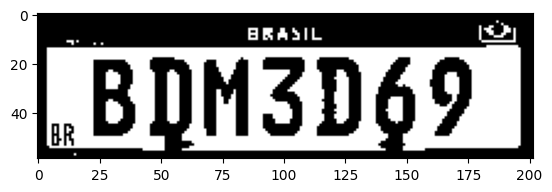

In [ ]:
for contorno in contornos:
    x, y, w, h = cv2.boundingRect(contorno) # Obtendo as coordenadas do retângulo que envolve o contorno
    proporcao = float(w)/h

    if proporcao >= 3.0 and proporcao <= 3.5:
        placa = img[y:y+h, x:x+w]
        break

valor, placa = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
placa = clear_border(placa)
plt.imshow(placa, cmap='gray') # Exibindo a imagem em tons de cinza

text = tess.image_to_string(placa, lang = 'por', config=config_tess)
text = re.search(regex, text)
print("Placa encontrada:", text.group(0))



# Conclusão
Durante o desenvolvimento do notebook foi possível entender a importância de utilizar técnicas de processamento de imagens para a indentificação de placas de veículos.  
Utilizando conceitos de limiarização e transformações morfológicas, foi possível extrair a posição da placa na imagem, extraindo assim o texto.